In [1]:
# loading packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading dataset
df_customer = pd.read_csv("C:/Users/giese/Desktop/outros_projetos/Projetos-python/customer-analytics/Train.csv", sep = ",")

In [3]:
# 5 first values from dataset
pd.set_option('display.max_columns', None)
df_customer.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [4]:
# geral info about dataset
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
# checking for NA values
df_customer.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [6]:
# dropping values that i will not use for exploratory analysis 
df_customer = df_customer.drop(["ID", "Warehouse_block"], axis = 1)

In [7]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Mode_of_Shipment     10999 non-null  object
 1   Customer_care_calls  10999 non-null  int64 
 2   Customer_rating      10999 non-null  int64 
 3   Cost_of_the_Product  10999 non-null  int64 
 4   Prior_purchases      10999 non-null  int64 
 5   Product_importance   10999 non-null  object
 6   Gender               10999 non-null  object
 7   Discount_offered     10999 non-null  int64 
 8   Weight_in_gms        10999 non-null  int64 
 9   Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 859.4+ KB


In [8]:
# exploratory analysis

In [9]:
df_customer.describe()

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         10999.000000     10999.000000         10999.000000   
mean              4.054459         2.990545           210.196836   
std               1.141490         1.413603            48.063272   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           169.000000   
50%               4.000000         3.000000           214.000000   
75%               5.000000         4.000000           251.000000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             1.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

In [10]:
df_customer["Mode_of_Shipment"].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [11]:
df_customer["Customer_care_calls"].value_counts()

4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64

In [12]:
df_customer["Customer_rating"].value_counts()

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

In [13]:
df_customer["Prior_purchases"].value_counts()

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64

In [14]:
df_customer["Product_importance"].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

In [15]:
df_customer["Reached.on.Time_Y.N"].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [16]:
df_customer["Gender"].value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

Text(0, 0.5, '')

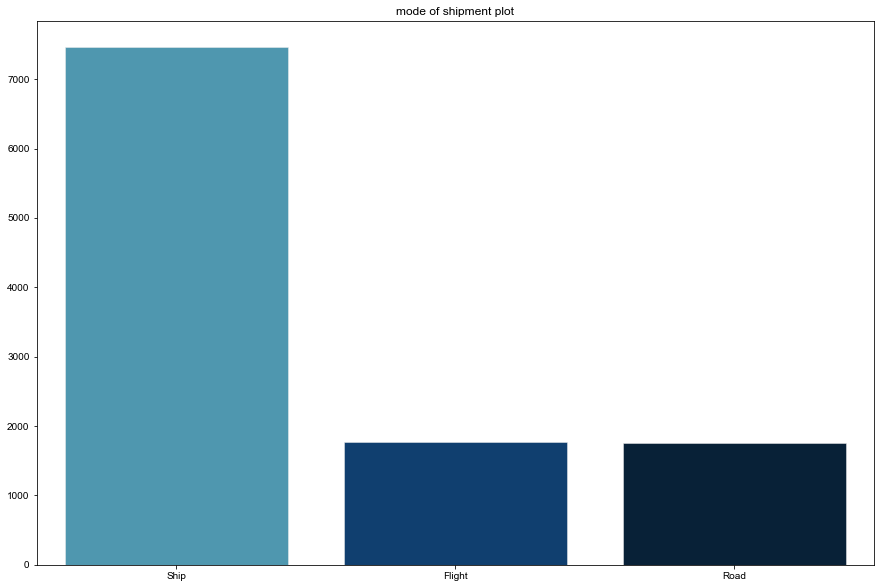

In [17]:
df_customer_ord = df_customer["Mode_of_Shipment"].value_counts().sort_values(ascending = False).index
plt.figure(figsize = (15,10))
plt.title('mode of shipment plot')
sns.set(font_scale = 3)
plt.style.use("ggplot")
sns.countplot(df_customer.Mode_of_Shipment, palette = "ocean_r", order = df_customer_ord)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

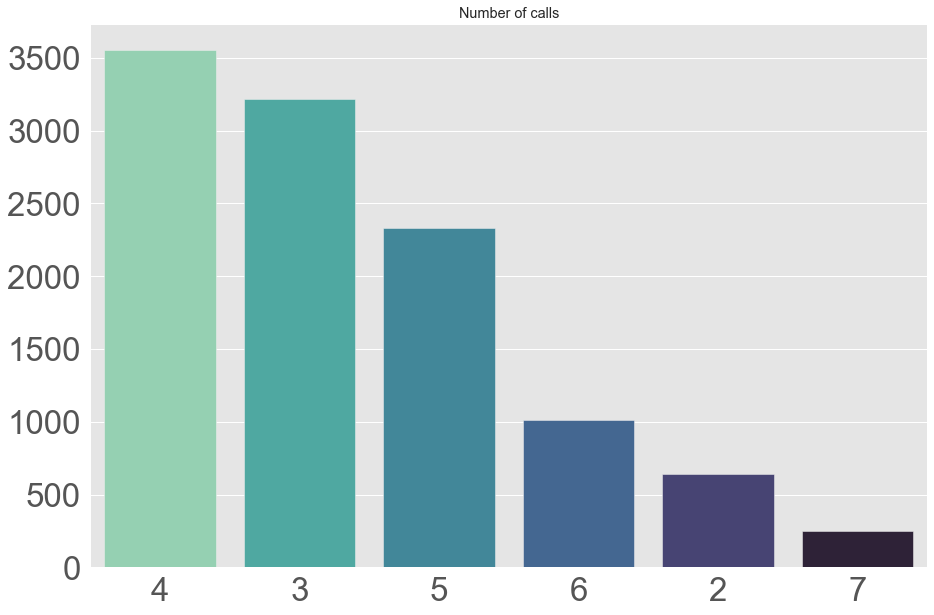

In [18]:
df_customer_ord = df_customer["Customer_care_calls"].value_counts().sort_values(ascending = False).index
plt.figure(figsize = (15,10))
plt.title('Number of calls')
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(df_customer.Customer_care_calls, palette = "mako_r", order = df_customer_ord)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

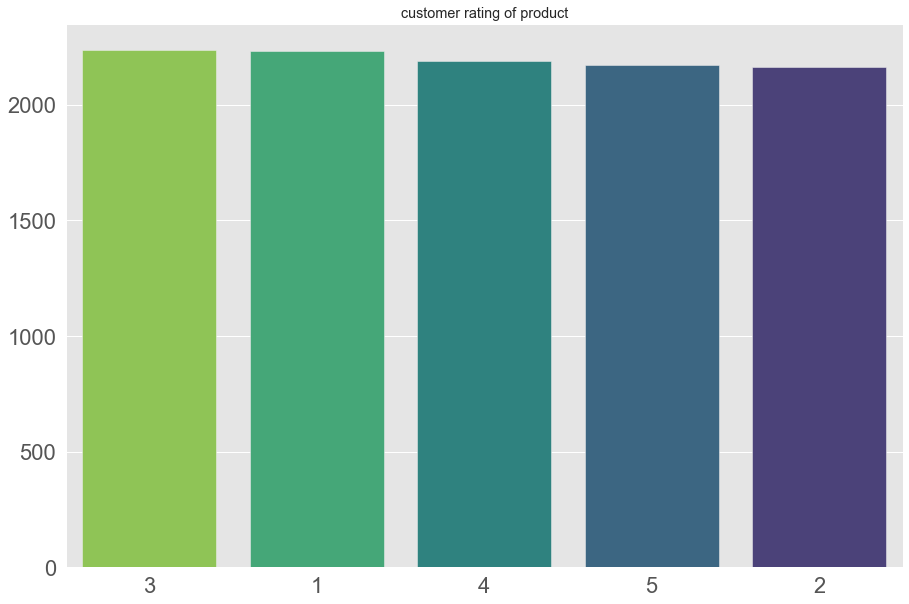

In [19]:
df_customer_ord = df_customer["Customer_rating"].value_counts().sort_values(ascending = False).index
plt.figure(figsize = (15,10))
plt.title('customer rating of product')
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(df_customer.Customer_rating, palette = "viridis_r", order = df_customer_ord)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

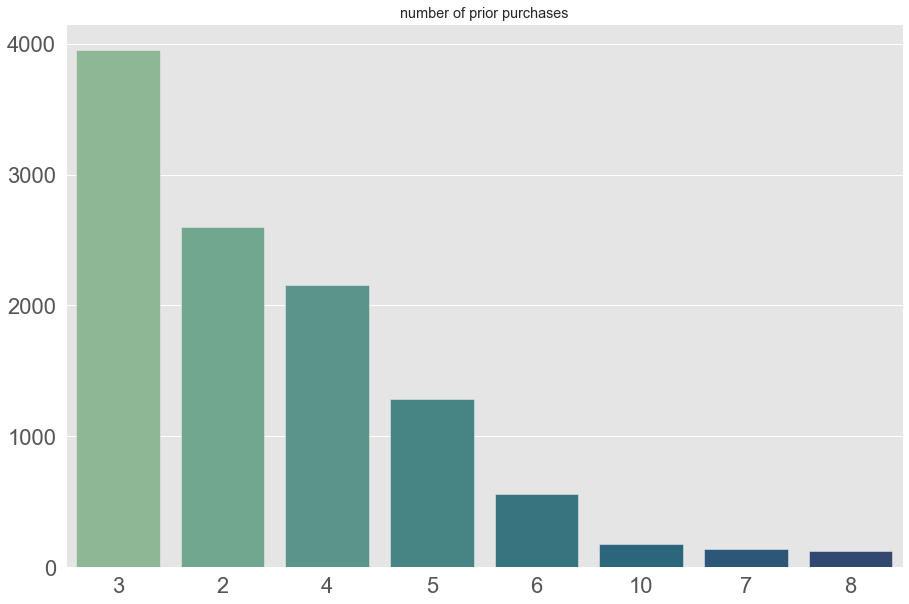

In [20]:
df_customer_ord = df_customer["Prior_purchases"].value_counts().sort_values(ascending = False).index
plt.figure(figsize = (15,10))
plt.title('number of prior purchases')
sns.set(font_scale = 3)
plt.style.use("ggplot")
sns.countplot(df_customer.Prior_purchases, palette = "crest", order = df_customer_ord)
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

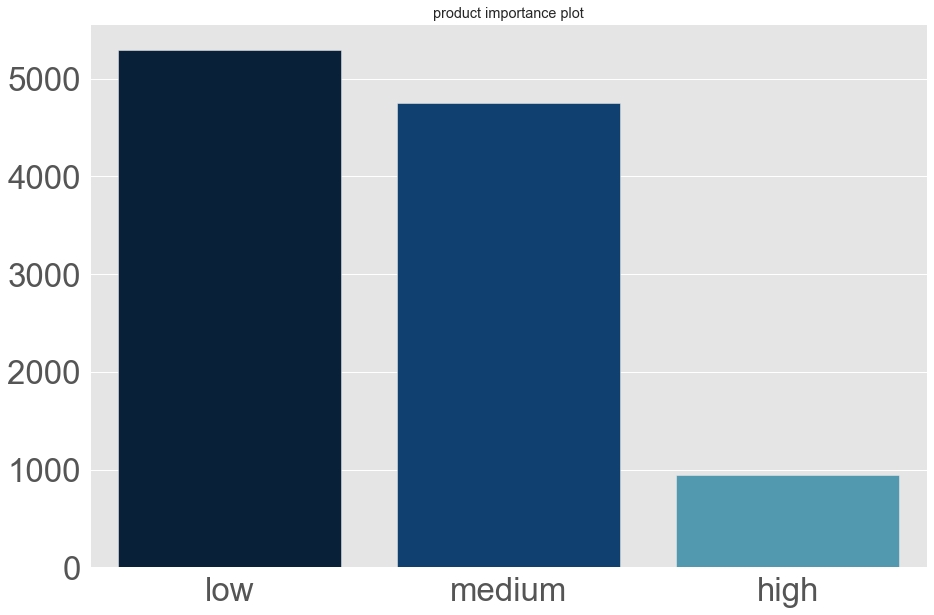

In [21]:
plt.figure(figsize = (15,10))
plt.title('product importance plot')
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(df_customer.Product_importance, palette = "ocean")
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

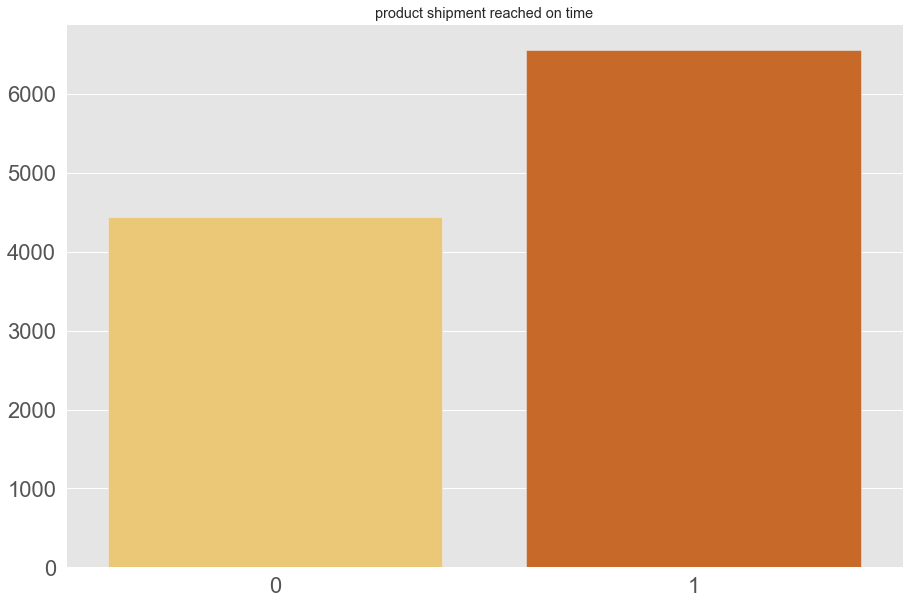

In [22]:
plt.figure(figsize = (15,10))
plt.title('product shipment reached on time')
sns.set(font_scale = 2)
plt.style.use("ggplot")
sns.countplot(data = df_customer, x = "Reached.on.Time_Y.N", palette = "YlOrBr")
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, 'Cost of the Product')

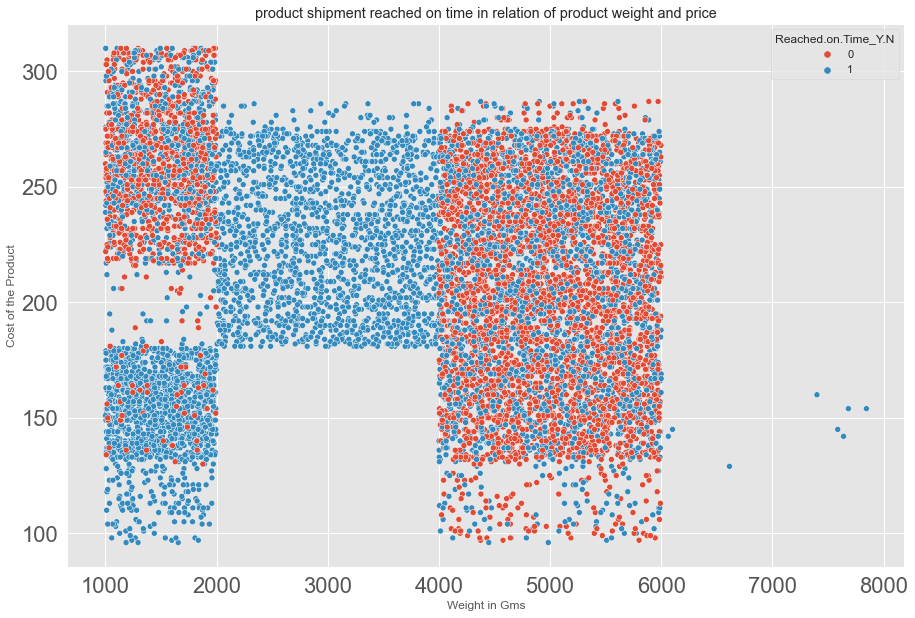

In [23]:
plt.figure(figsize = (15,10))
plt.title('product shipment reached on time in relation of product weight and price')
sns.set(font_scale = 1)
plt.style.use("ggplot")
sns.scatterplot(data = df_customer, x = "Weight_in_gms", y = "Cost_of_the_Product",
                hue = "Reached.on.Time_Y.N")
plt.xlabel("Weight in Gms")
plt.ylabel("Cost of the Product")

Text(0, 0.5, 'Cost of the Product')

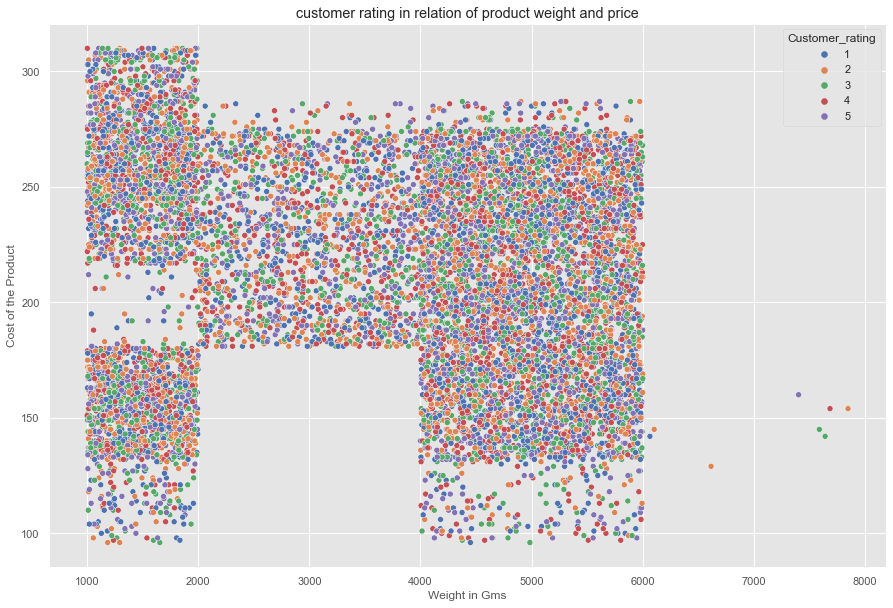

In [24]:
plt.figure(figsize = (15,10))
plt.title('customer rating in relation of product weight and price')
sns.set(font_scale = 1)
plt.style.use("ggplot")
sns.scatterplot(data = df_customer, x = "Weight_in_gms", y = "Cost_of_the_Product",
                hue = "Customer_rating", palette = "deep")
plt.xlabel("Weight in Gms")
plt.ylabel("Cost of the Product")

Text(0, 0.5, 'Cost of the Product')

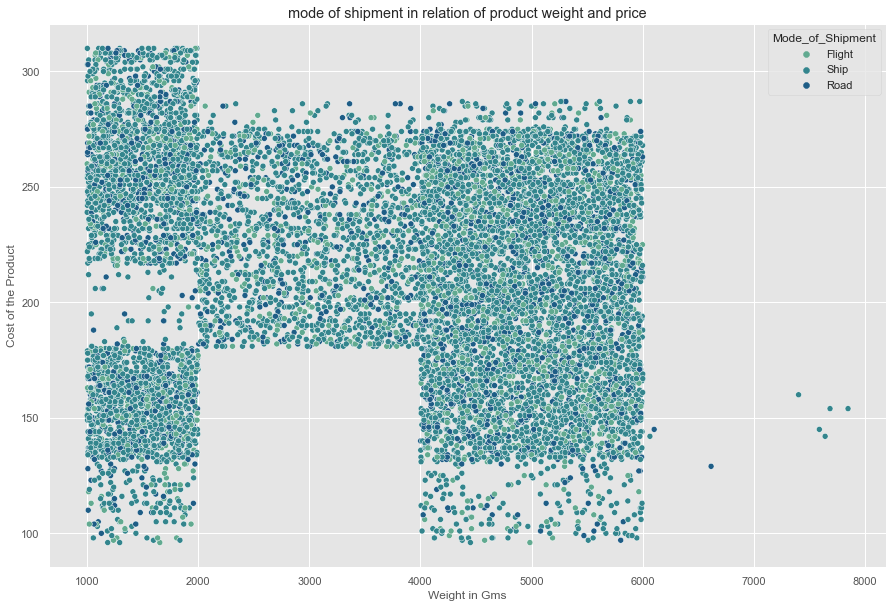

In [25]:
plt.figure(figsize = (15,10))
plt.title('mode of shipment in relation of product weight and price')
sns.set(font_scale = 1)
plt.style.use("ggplot")
sns.scatterplot(data = df_customer, x = "Weight_in_gms", y = "Cost_of_the_Product",
                hue = "Mode_of_Shipment", palette = "crest")
plt.xlabel("Weight in Gms")
plt.ylabel("Cost of the Product")

Text(0, 0.5, 'Discount offerred')

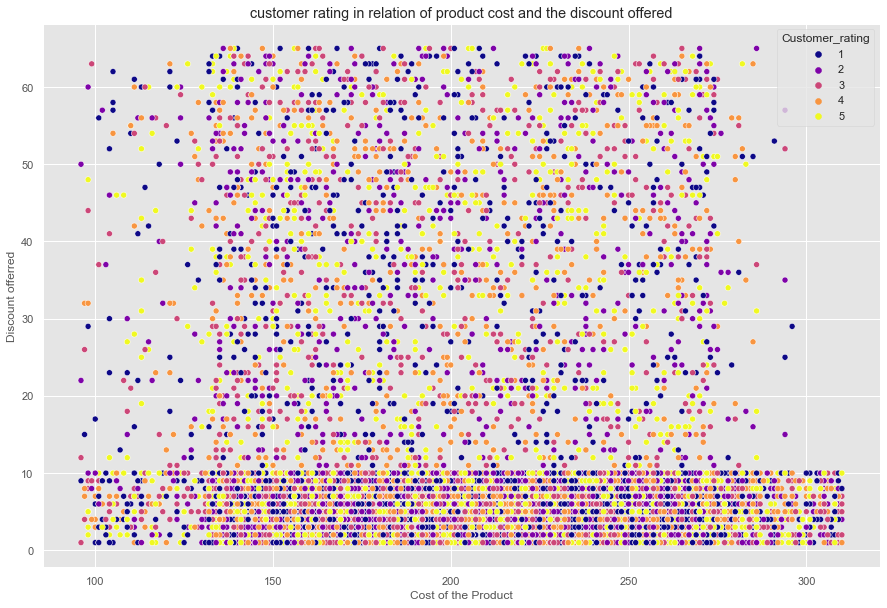

In [26]:
plt.figure(figsize = (15,10))
plt.title('customer rating in relation of product cost and the discount offered')
sns.set(font_scale = 1)
plt.style.use("ggplot")
sns.scatterplot(data = df_customer, x = "Cost_of_the_Product", y = "Discount_offered",
                hue = "Customer_rating", palette = "plasma")
plt.xlabel("Cost of the Product")
plt.ylabel("Discount offerred")

Text(0, 0.5, 'Discount offerred')

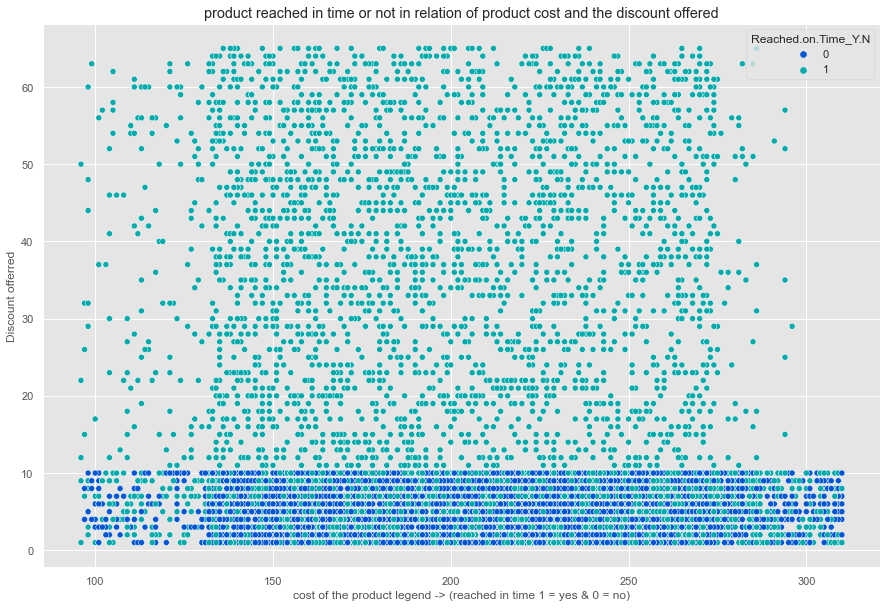

In [27]:

plt.figure(figsize = (15,10))
plt.title('product reached in time or not in relation of product cost and the discount offered')
sns.set(font_scale = 1)
plt.style.use("ggplot")
sns.scatterplot(data = df_customer, x = "Cost_of_the_Product", y = "Discount_offered",
                hue = "Reached.on.Time_Y.N", palette = "winter")
plt.xlabel('cost of the product legend -> (reached in time 1 = yes & 0 = no)')
plt.ylabel("Discount offerred")

Text(0, 0.5, 'Discount offerred')

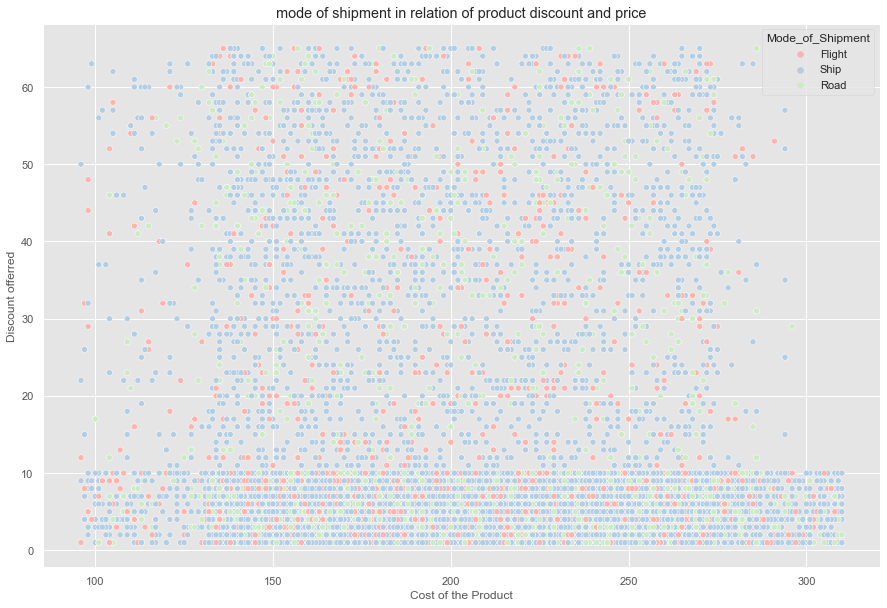

In [28]:
plt.figure(figsize = (15,10))
plt.title('mode of shipment in relation of product discount and price')
sns.set(font_scale = 1)
plt.style.use("ggplot")
sns.scatterplot(data = df_customer, x = "Cost_of_the_Product", y = "Discount_offered",
                hue = "Mode_of_Shipment", palette = "Pastel1")
plt.xlabel("Cost of the Product")
plt.ylabel("Discount offerred")

Text(0, 0.5, 'Discount offerred')

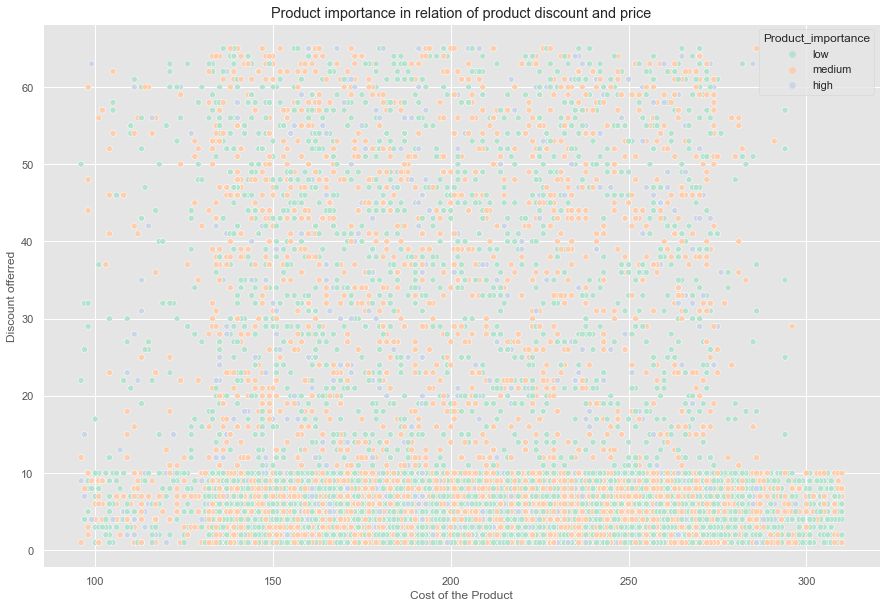

In [29]:
plt.figure(figsize = (15,10))
plt.title('Product importance in relation of product discount and price')
sns.set(font_scale = 1)
plt.style.use("ggplot")
sns.scatterplot(data = df_customer, x = "Cost_of_the_Product", y = "Discount_offered",
                hue = "Product_importance", palette = "Pastel2")
plt.xlabel("Cost of the Product")
plt.ylabel("Discount offerred")

Text(0, 0.5, 'Discount offerred')

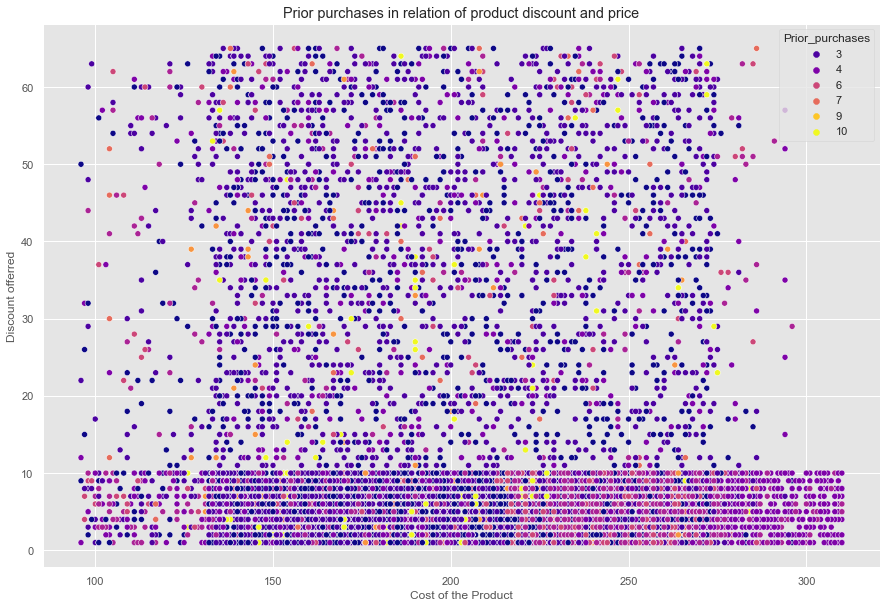

In [30]:
plt.figure(figsize = (15,10))
plt.title('Prior purchases in relation of product discount and price')
sns.set(font_scale = 1)
plt.style.use("ggplot")
sns.scatterplot(data = df_customer, x = "Cost_of_the_Product", y = "Discount_offered",
                hue = "Prior_purchases", palette = "plasma")
plt.xlabel("Cost of the Product")
plt.ylabel("Discount offerred")

Text(25.125, 0.5, 'Cost of the Product')

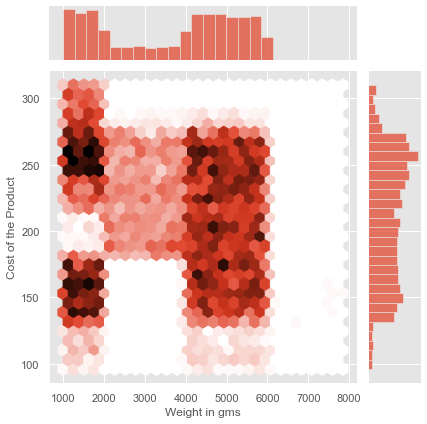

In [31]:
sns.set(font_scale = 1)
plt.style.use("ggplot")
sns.jointplot(x = 'Weight_in_gms',y = 'Cost_of_the_Product',data = df_customer,kind = 'hex')
plt.xlabel("Weight in gms")
plt.ylabel("Cost of the Product")

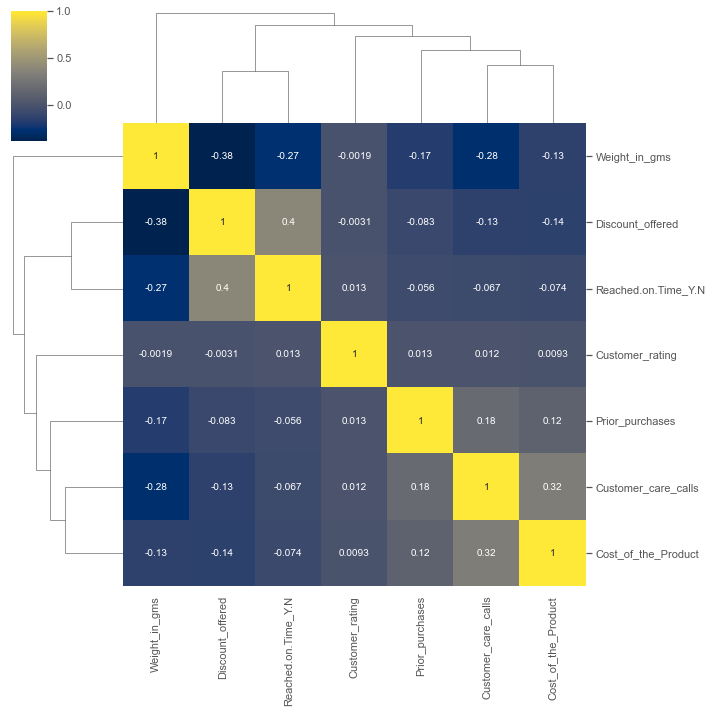

In [32]:
sns.clustermap(df_customer.corr(),annot = True,cmap = 'cividis')

In [33]:
# pre processing and machine learning

In [34]:
df_customer_dum = pd.get_dummies(df_customer)
df_customer_dum.head()

Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    4                2                  177                3   
1                    4                5                  216                2   
2                    2                2                  183                4   
3                    3                3                  176                4   
4                    2                2                  184                3   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  \
0                44           1233                    1   
1                59           3088                    1   
2                48           3374                    1   
3                10           1177                    1   
4                46           2484                    1   

   Mode_of_Shipment_Flight  Mode_of_Shipment_Road  Mode_of_Shipment_Ship  \
0                        1                      0                      0   
1                        1                      0                      0   
2                        1                      0                      0   
3                        1                      0                      0   
4                        1                      0                      0   

   Product_importance_high  Product_importance_low  Product_importance_medium  \
0                        0                       1                          0   
1                        0                       1                          0   
2                        0                       1                          0   
3                        0                       0                          1   
4                        0                       0                          1   

   Gender_F  Gender_M  
0         1         0  
1         0         1  
2         0         1  
3         0         1  
4         1         0

In [35]:
df_customer_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Customer_care_calls        10999 non-null  int64
 1   Customer_rating            10999 non-null  int64
 2   Cost_of_the_Product        10999 non-null  int64
 3   Prior_purchases            10999 non-null  int64
 4   Discount_offered           10999 non-null  int64
 5   Weight_in_gms              10999 non-null  int64
 6   Reached.on.Time_Y.N        10999 non-null  int64
 7   Mode_of_Shipment_Flight    10999 non-null  uint8
 8   Mode_of_Shipment_Road      10999 non-null  uint8
 9   Mode_of_Shipment_Ship      10999 non-null  uint8
 10  Product_importance_high    10999 non-null  uint8
 11  Product_importance_low     10999 non-null  uint8
 12  Product_importance_medium  10999 non-null  uint8
 13  Gender_F                   10999 non-null  uint8
 14  Gender_M              

In [36]:
features = df_customer_dum.drop("Reached.on.Time_Y.N", axis = 1)
targetvariable = df_customer_dum["Reached.on.Time_Y.N"]
print(features)

       Customer_care_calls  Customer_rating  Cost_of_the_Product  \
0                        4                2                  177   
1                        4                5                  216   
2                        2                2                  183   
3                        3                3                  176   
4                        2                2                  184   
...                    ...              ...                  ...   
10994                    4                1                  252   
10995                    4                1                  232   
10996                    5                4                  242   
10997                    5                2                  223   
10998                    2                5                  155   

       Prior_purchases  Discount_offered  Weight_in_gms  \
0                    3                44           1233   
1                    2                59           3088   
2     

In [37]:
df_customer_dum["Reached.on.Time_Y.N"].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [38]:
featureTrain, featureTest, targetTrain, targetTest = train_test_split(features, targetvariable, test_size = 0.3, random_state = 0)

In [39]:
clf = DecisionTreeClassifier(max_depth = 3)
print(clf)

DecisionTreeClassifier(max_depth=3)


In [40]:
modelo = clf.fit(featureTrain, targetTrain)
previsoes = modelo.predict(featureTest)

In [41]:
print(classification_report(targetTest, previsoes))
print (confusion_matrix(targetTest, previsoes))
print (accuracy_score(targetTest, previsoes))

              precision    recall  f1-score   support

           0       0.57      0.95      0.71      1379
           1       0.94      0.49      0.64      1921

    accuracy                           0.68      3300
   macro avg       0.75      0.72      0.68      3300
weighted avg       0.78      0.68      0.67      3300

[[1316   63]
 [ 988  933]]
0.6815151515151515


In [42]:
random_forest = RandomForestClassifier(n_estimators=300, bootstrap=True, random_state=0)
random_forest.fit(featureTrain, targetTrain)

RandomForestClassifier(n_estimators=300, random_state=0)

In [43]:
random_forest_predict = random_forest.predict(featureTest)

In [44]:
print(classification_report(targetTest, random_forest_predict))
print(confusion_matrix(targetTest, random_forest_predict))
print(accuracy_score(targetTest, random_forest_predict))

              precision    recall  f1-score   support

           0       0.58      0.66      0.62      1379
           1       0.73      0.66      0.69      1921

    accuracy                           0.66      3300
   macro avg       0.66      0.66      0.66      3300
weighted avg       0.67      0.66      0.66      3300

[[ 911  468]
 [ 650 1271]]
0.6612121212121213


In [45]:
neighbor = KNeighborsClassifier(n_neighbors = 4)

In [46]:
neighbor.fit(featureTrain, targetTrain)

KNeighborsClassifier(n_neighbors=4)

In [47]:
neighbor_predict = neighbor.predict(featureTest)

In [48]:
print(confusion_matrix(targetTest, neighbor_predict))
print(classification_report(targetTest, neighbor_predict))
print(accuracy_score(targetTest, neighbor_predict))

[[1048  331]
 [ 769 1152]]
              precision    recall  f1-score   support

           0       0.58      0.76      0.66      1379
           1       0.78      0.60      0.68      1921

    accuracy                           0.67      3300
   macro avg       0.68      0.68      0.67      3300
weighted avg       0.69      0.67      0.67      3300

0.6666666666666666


In [49]:
error_rate = []

for i in range(1,40):
    neighbor = KNeighborsClassifier(n_neighbors = i)
    neighbor.fit(featureTrain, targetTrain)
    knnpredict = neighbor.predict(featureTest)
    error_rate.append(np.mean(knnpredict != targetTest))

Text(0, 0.5, 'Error Rate')

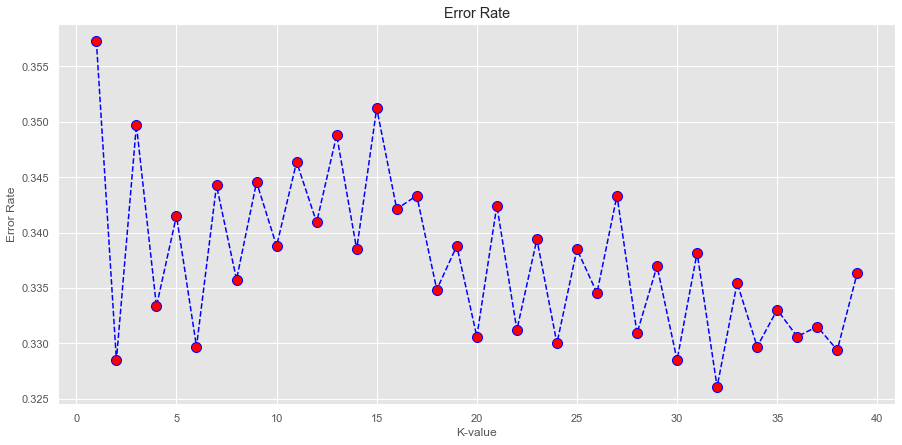

In [50]:
plt.figure(figsize = (15,7))
plt.plot(range(1,40), error_rate, color = "blue", ls = "dashed", marker = "o", markerfacecolor = "red",
         markersize = 10)
plt.title("Error Rate")
plt.xlabel("K-value")
plt.ylabel("Error Rate")

In [51]:
neighbor = KNeighborsClassifier(n_neighbors=33)
neighbor.fit(featureTrain, targetTrain)
knnpredict = neighbor.predict(featureTest)

In [52]:
print(confusion_matrix(targetTest, neighbor_predict))
print(classification_report(targetTest, neighbor_predict))
print(accuracy_score(targetTest, neighbor_predict))

[[1048  331]
 [ 769 1152]]
              precision    recall  f1-score   support

           0       0.58      0.76      0.66      1379
           1       0.78      0.60      0.68      1921

    accuracy                           0.67      3300
   macro avg       0.68      0.68      0.67      3300
weighted avg       0.69      0.67      0.67      3300

0.6666666666666666


In [53]:
support = SVC(random_state = 0)

In [54]:
support.fit(featureTrain, targetTrain)

SVC(random_state=0)

In [55]:
support_predict = support.predict(featureTest)

In [56]:
print(classification_report(targetTest, support_predict))
print(confusion_matrix(targetTest, support_predict))
print(accuracy_score(targetTest, support_predict))

              precision    recall  f1-score   support

           0       0.59      0.60      0.59      1379
           1       0.71      0.70      0.70      1921

    accuracy                           0.66      3300
   macro avg       0.65      0.65      0.65      3300
weighted avg       0.66      0.66      0.66      3300

[[ 827  552]
 [ 575 1346]]
0.6584848484848485


In [57]:
lgmodel = LogisticRegression()

In [58]:
lgmodel.fit(featureTrain, targetTrain)

LogisticRegression()

In [59]:
lgmodel_predict = lgmodel.predict(featureTest)

In [60]:
print(classification_report(targetTest, lgmodel_predict))
print(confusion_matrix(targetTest, lgmodel_predict))
print(accuracy_score(targetTest, lgmodel_predict))

              precision    recall  f1-score   support

           0       0.55      0.56      0.55      1379
           1       0.68      0.67      0.67      1921

    accuracy                           0.62      3300
   macro avg       0.61      0.61      0.61      3300
weighted avg       0.62      0.62      0.62      3300

[[ 767  612]
 [ 632 1289]]
0.623030303030303


In [61]:
ft_importance = random_forest.feature_importances_
print(ft_importance)

[0.06368382 0.06692072 0.19264662 0.06622738 0.23401261 0.29580102
 0.00961621 0.00914518 0.01157749 0.00624172 0.01090587 0.0110014
 0.01112383 0.01109612]


Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship', 'Product_importance_high',
       'Product_importance_low', 'Product_importance_medium', 'Gender_F',
       'Gender_M'],
      dtype='object')


<BarContainer object of 14 artists>

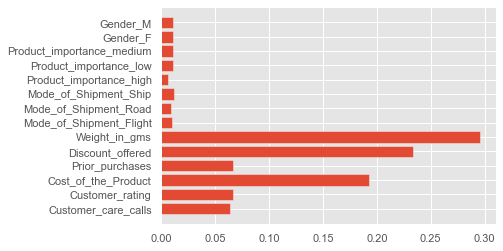

In [62]:
features2 = features.columns
print(features2)
plt.barh(features2, ft_importance)

In [63]:
df_customer.head()

Mode_of_Shipment  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
0           Flight                    4                2                  177   
1           Flight                    4                5                  216   
2           Flight                    2                2                  183   
3           Flight                    3                3                  176   
4           Flight                    2                2                  184   

   Prior_purchases Product_importance Gender  Discount_offered  Weight_in_gms  \
0                3                low      F                44           1233   
1                2                low      M                59           3088   
2                4                low      M                48           3374   
3                4             medium      M                10           1177   
4                3             medium      F                46           2484   

   Reached.on.Time_Y.N  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [64]:
df_customer = df_customer.drop(["Mode_of_Shipment", "Product_importance", "Gender"], axis = 1)

In [65]:
features = df_customer.drop("Reached.on.Time_Y.N", axis = 1)
targetvariable = df_customer["Reached.on.Time_Y.N"]
print(features)

       Customer_care_calls  Customer_rating  Cost_of_the_Product  \
0                        4                2                  177   
1                        4                5                  216   
2                        2                2                  183   
3                        3                3                  176   
4                        2                2                  184   
...                    ...              ...                  ...   
10994                    4                1                  252   
10995                    4                1                  232   
10996                    5                4                  242   
10997                    5                2                  223   
10998                    2                5                  155   

       Prior_purchases  Discount_offered  Weight_in_gms  
0                    3                44           1233  
1                    2                59           3088  
2        

In [66]:
featureTrain, featureTest, targetTrain, targetTest = train_test_split(features, targetvariable, test_size = 0.3, random_state = 0)

In [67]:
clf = DecisionTreeClassifier(max_depth = 6, criterion = "entropy")
print(clf)

DecisionTreeClassifier(criterion='entropy', max_depth=6)


In [68]:
modelo = clf.fit(featureTrain, targetTrain)
previsoes = modelo.predict(featureTest)

In [69]:
print(classification_report(targetTest, previsoes))
print (confusion_matrix(targetTest, previsoes))
print (accuracy_score(targetTest, previsoes))

              precision    recall  f1-score   support

           0       0.58      0.94      0.72      1379
           1       0.92      0.52      0.66      1921

    accuracy                           0.69      3300
   macro avg       0.75      0.73      0.69      3300
weighted avg       0.78      0.69      0.68      3300

[[1290   89]
 [ 931  990]]
0.6909090909090909


In [70]:
random_forest = RandomForestClassifier(max_depth = 4, n_estimators=250, bootstrap=True, random_state=0)
random_forest.fit(featureTrain, targetTrain)

RandomForestClassifier(max_depth=4, n_estimators=250, random_state=0)

In [71]:
random_forest_predict = random_forest.predict(featureTest)

In [72]:
print(classification_report(targetTest, random_forest_predict))
print(confusion_matrix(targetTest, random_forest_predict))
print(accuracy_score(targetTest, random_forest_predict))

              precision    recall  f1-score   support

           0       0.58      0.92      0.71      1379
           1       0.90      0.53      0.67      1921

    accuracy                           0.69      3300
   macro avg       0.74      0.72      0.69      3300
weighted avg       0.77      0.69      0.69      3300

[[1266  113]
 [ 907 1014]]
0.6909090909090909


In [73]:
neighbor = KNeighborsClassifier(n_neighbors = 4)

In [74]:
neighbor.fit(featureTrain, targetTrain)

KNeighborsClassifier(n_neighbors=4)

In [75]:
neighbor_predict = neighbor.predict(featureTest)

In [76]:
print(confusion_matrix(targetTest, neighbor_predict))
print(classification_report(targetTest, neighbor_predict))
print(accuracy_score(targetTest, neighbor_predict))

[[1050  329]
 [ 770 1151]]
              precision    recall  f1-score   support

           0       0.58      0.76      0.66      1379
           1       0.78      0.60      0.68      1921

    accuracy                           0.67      3300
   macro avg       0.68      0.68      0.67      3300
weighted avg       0.69      0.67      0.67      3300

0.666969696969697


In [77]:
error_rate = []

for i in range(1,40):
    neighbor = KNeighborsClassifier(n_neighbors = i)
    neighbor.fit(featureTrain, targetTrain)
    knnpredict = neighbor.predict(featureTest)
    error_rate.append(np.mean(knnpredict != targetTest))

Text(0, 0.5, 'Error Rate')

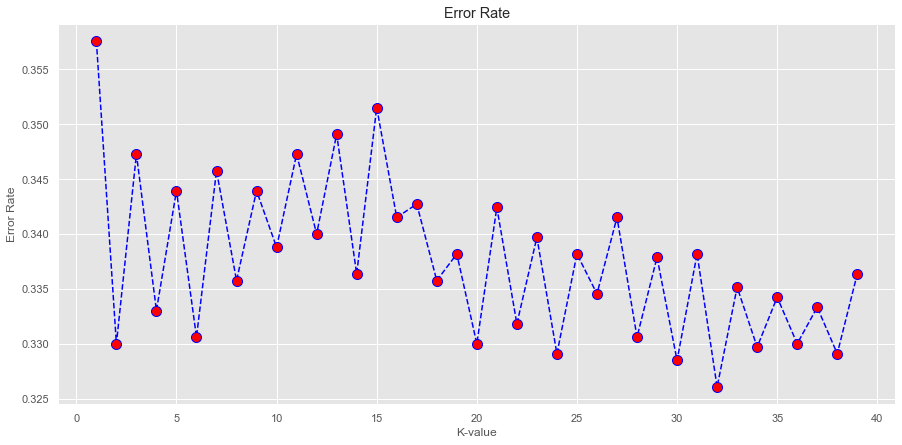

In [78]:
plt.figure(figsize = (15,7))
plt.plot(range(1,40), error_rate, color = "blue", ls = "dashed", marker = "o", markerfacecolor = "red",
         markersize = 10)
plt.title("Error Rate")
plt.xlabel("K-value")
plt.ylabel("Error Rate")

In [79]:
neighbor = KNeighborsClassifier(n_neighbors=33, )
neighbor.fit(featureTrain, targetTrain)
knnpredict = neighbor.predict(featureTest)

In [80]:
print(confusion_matrix(targetTest, knnpredict))
print(classification_report(targetTest, knnpredict))
print(accuracy_score(targetTest, knnpredict))

[[ 996  383]
 [ 723 1198]]
              precision    recall  f1-score   support

           0       0.58      0.72      0.64      1379
           1       0.76      0.62      0.68      1921

    accuracy                           0.66      3300
   macro avg       0.67      0.67      0.66      3300
weighted avg       0.68      0.66      0.67      3300

0.6648484848484848


In [81]:
support = SVC(random_state = 0)

In [82]:
support.fit(featureTrain, targetTrain)

SVC(random_state=0)

In [83]:
support_predict = support.predict(featureTest)

In [84]:
print(classification_report(targetTest, support_predict))
print(confusion_matrix(targetTest, support_predict))
print(accuracy_score(targetTest, support_predict))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60      1379
           1       0.71      0.70      0.70      1921

    accuracy                           0.66      3300
   macro avg       0.65      0.65      0.65      3300
weighted avg       0.66      0.66      0.66      3300

[[ 838  541]
 [ 582 1339]]
0.6596969696969697


In [85]:
lgmodel = LogisticRegression()

In [86]:
lgmodel.fit(featureTrain, targetTrain)

LogisticRegression()

In [87]:
lgmodel_predict = lgmodel.predict(featureTest)

In [88]:
print(classification_report(targetTest, lgmodel_predict))
print(confusion_matrix(targetTest, lgmodel_predict))
print(accuracy_score(targetTest, lgmodel_predict))

              precision    recall  f1-score   support

           0       0.55      0.56      0.55      1379
           1       0.68      0.67      0.67      1921

    accuracy                           0.62      3300
   macro avg       0.61      0.61      0.61      3300
weighted avg       0.62      0.62      0.62      3300

[[ 773  606]
 [ 638 1283]]
0.623030303030303


In [89]:
ft_importance = random_forest.feature_importances_
print(ft_importance)

[0.01228596 0.00234933 0.0404701  0.04716683 0.54773061 0.34999716]


Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')


<BarContainer object of 6 artists>

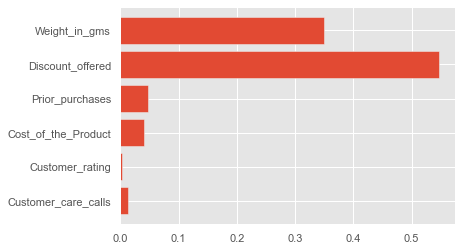

In [90]:
features2 = features.columns
print(features2)
plt.barh(features2, ft_importance)

In [91]:
report = [["Support Vector Machines", 0.65, 0.65, 0.65, 0.65], ["Random Forest", 0.69, 0.74, 0.72, 0.69], 
          ["K-nearest neighbor", 0.66, 0.67, 0.67, 0.66], ["Decision Tree", 0.69, 0.75, 0.73, 0.69],
         ["Linear regression", 0.62, 0.61, 0.61, 0.61]]
overall_result = pd.DataFrame(report, columns = ["Model", "Accuracy Score", "Precision", "Recall", "F1-score"])
overall_result.sort_values("Accuracy Score", ascending = False)

Model  Accuracy Score  Precision  Recall  F1-score
1            Random Forest            0.69       0.74    0.72      0.69
3            Decision Tree            0.69       0.75    0.73      0.69
2       K-nearest neighbor            0.66       0.67    0.67      0.66
0  Support Vector Machines            0.65       0.65    0.65      0.65
4        Linear regression            0.62       0.61    0.61      0.61